In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
r0 = 0.05
kappa = 0.3
theta = 0.08
sigma = 0.1
T = 1  # 1 year
dt = 0.1
n_simulations = 5  # Fewer paths for easy visualization

In [3]:
def cox_ingersoll_ross_model_full_path(r0, kappa, theta, sigma, T, dt, n_simulations):
    """
    CIR model with full path output.
    """
    n_steps = int(T / dt)
    dt_sqrt = np.sqrt(dt)
    rates = np.zeros((n_simulations, n_steps + 1))
    rates[:, 0] = r0
    random_shocks = np.random.normal(0, 1, (n_simulations, n_steps))

    for t in range(1, n_steps + 1):
        drift = kappa * (theta - rates[:, t-1]) * dt
        diffusion = sigma * np.sqrt(np.maximum(rates[:, t-1], 0)) * dt_sqrt * random_shocks[:, t-1]
        rates[:, t] = np.maximum(rates[:, t-1] + drift + diffusion, 0)

    return rates

In [4]:
# Run model
paths = cox_ingersoll_ross_model_full_path(r0, kappa, theta, sigma, T, dt, n_simulations)

# Print first 10 steps
print("First 10 steps of CIR simulation:")
print(paths[:, :10])

First 10 steps of CIR simulation:
[[0.05       0.04229223 0.03580282 0.03848513 0.03131201 0.03287971
  0.04171416 0.03780755 0.02936406 0.03860155]
 [0.05       0.04999264 0.04536364 0.04104919 0.03707645 0.03150207
  0.04463553 0.04479551 0.03424161 0.03905463]
 [0.05       0.05542499 0.06410606 0.05503744 0.03421341 0.03569824
  0.04059703 0.03382308 0.03674209 0.0494717 ]
 [0.05       0.0518562  0.04610563 0.03880974 0.03931229 0.02804353
  0.0217472  0.01658164 0.01912505 0.02575427]
 [0.05       0.0480331  0.04715865 0.04452103 0.03222405 0.03211407
  0.02731629 0.02746651 0.03073491 0.03151453]]


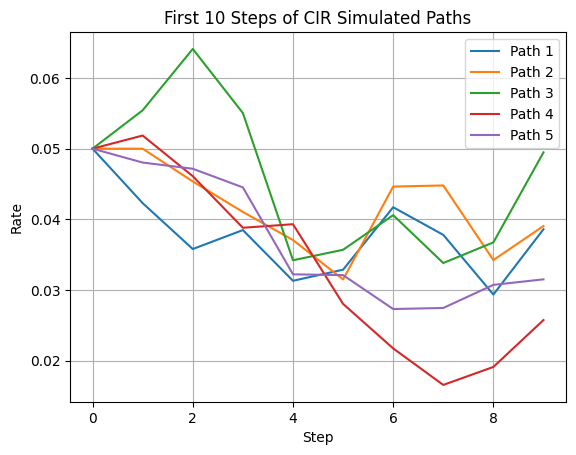

In [5]:
# plot the paths
for i in range(n_simulations):
    plt.plot(paths[i, :10], label=f'Path {i+1}')
plt.title('First 10 Steps of CIR Simulated Paths')
plt.xlabel('Step')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()